<a href="https://colab.research.google.com/github/jadewumi/DS_lists/blob/main/Projects/Project2_MakingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset.

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model
5.  Measure the performance of your model
6.  Summarize and interpret your results



**Action:** Import python libraries


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <font color='lightblue'>1. Data Understanding </font>

**Action:** Import your data into colaboratory.


In [ ]:
df_churn = pd.read_csv('/content/churn.csv')

In [6]:
df_churn.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [7]:
df_churn.tail(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df_churn.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df_churn = df_churn.rename(columns={
"RowNumber":"row_number",
"CustomerId":"customer_id",
"Surname":"surname",
"CreditScore":"credit_score",
"Geography": "geography",
"Gender": "gender",
"Age": "age",
"Tenure": "tenure",
"Balance": "balance",
"NumOfProducts": "num_products",
"HasCrCard": "has_credit_card",
"IsActiveMember": "is_active_member",
"EstimatedSalary": "estimated_salary",
"Exited": "churn"
})

df_churn.head(2)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_credit_card,is_active_member,estimated_salary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

In [10]:
df_churn[['credit_score', 'age','tenure','balance','estimated_salary','num_products']].describe()

,credit_score,age,tenure,balance,estimated_salary,num_products
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,1.530200
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.581654
min,350.000000,18.000000,0.000000,0.000000,11.580000,1.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,1.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,2.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,4.000000


## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

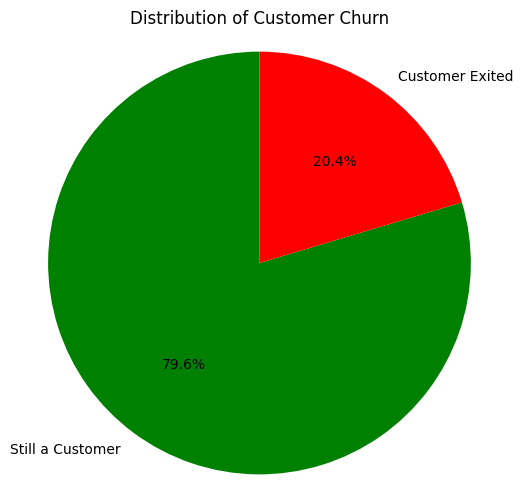

In [14]:
# Count True and False values
churn_counts = df_churn['churn'].value_counts()
# Define labels and colors
labels = ['Still a Customer', 'Customer Exited']
colors = ['green', 'red']
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Churn')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

**Intrepretation**(Churn rate = 20.4%):
Out of every 100 customers, about 20 leave the bank, reflecting a churn rate of 20.4%. The remaining 79.6% continue their relationship with the bank, representing its retained customer base.

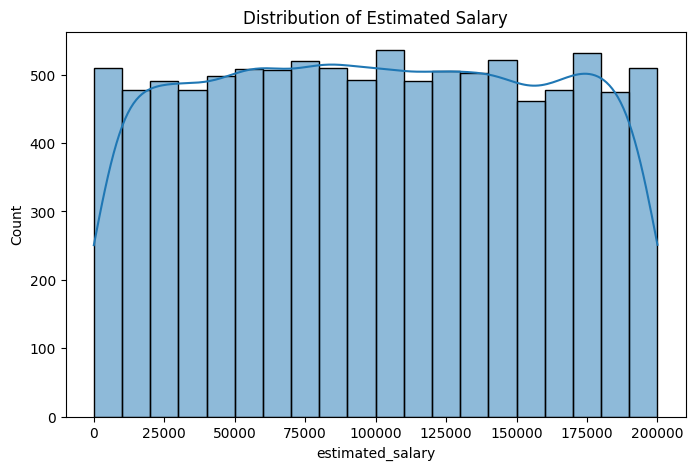

In [23]:
# Histogram of Estimated Salary
plt.figure(figsize=(8,5))
sns.histplot(df_churn['estimated_salary'], bins=20, kde=True)
plt.title("Distribution of Estimated Salary")
plt.xlabel("estimated_salary")
plt.ylabel("Count")
plt.show()

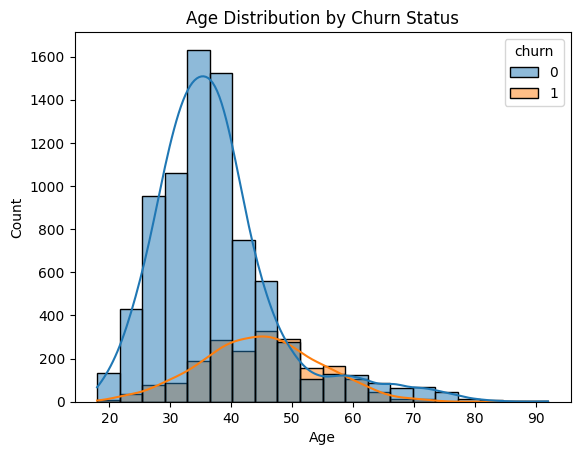

In [20]:
sns.histplot(data=df_churn, x='age',hue ='churn', bins=20, kde=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


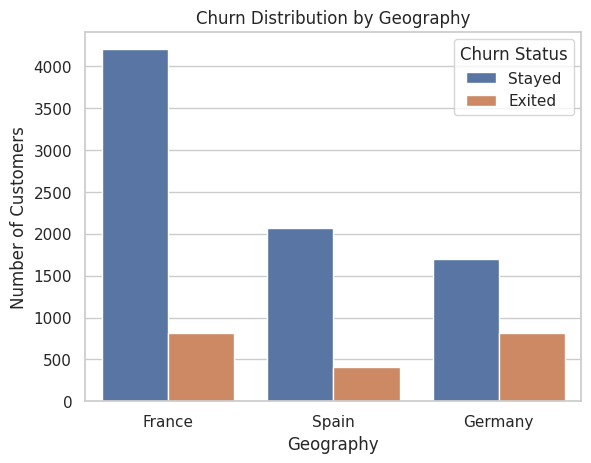

In [25]:

# Create a count plot
sns.countplot(data=df_churn, x="geography", hue="churn")
# Add titles and labels
plt.title("Churn Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=["Stayed", "Exited"])
plt.show()


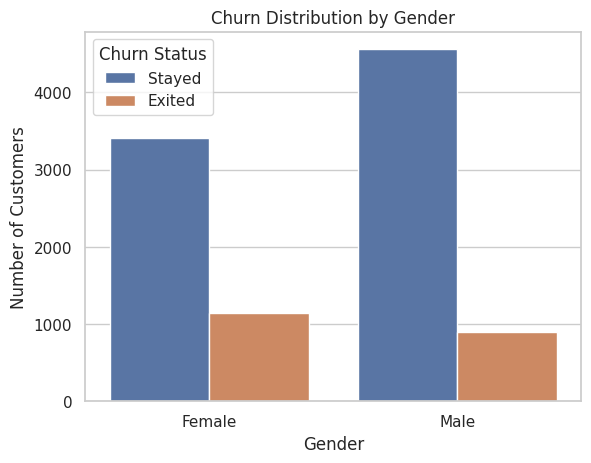

In [26]:
# Create a count plot
sns.countplot(data=df_churn, x="gender", hue="churn")

# Add titles and labels
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=["Stayed", "Exited"])
plt.show()


Mean Credit Score:credit_score    650.5288
dtype: float64


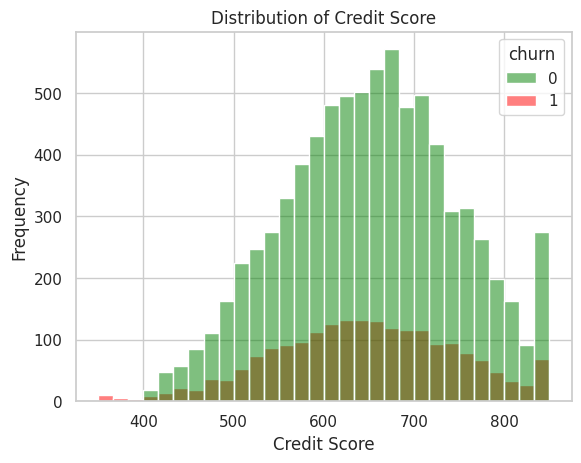

In [30]:
sns.histplot(df_churn, x='credit_score',    hue='churn',palette={0: 'green', 1: 'red'}, bins=30, )
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
mean_credirScore=df_churn[['credit_score']].mean()
print(f"Mean Credit Score:{mean_credirScore}")

**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1*

In [32]:
df_churn[['credit_score', 'age','tenure','balance','estimated_salary','churn']].corr()

,credit_score,age,tenure,balance,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,0.012797,0.118533
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,0.012097,1.000000


## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

**Action:** Split your data into training and testing datasets *Marks: 1*

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

## <font color='lightblue'>5. Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:**
> What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*

> What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*

> How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*